In [3]:
# !pip install simple_image_download==0.4

  Using cached simple_image_download-0.4-py3-none-any.whl (4.9 kB)
  Using cached python_magic_bin-0.4.14-py2.py3-none-win_amd64.whl (409 kB)
  Using cached progressbar-2.5-py3-none-any.whl


In [6]:
from simple_image_download import simple_image_download as simp

In [7]:
response = simp.simple_image_download
keywords = ["car","other object"]

In [8]:
for kw in keywords:
    response().download(kw , 100)

[========================================================================] 100%
[========================================================================] 100%


## Étape 1 : Préparation des données

In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemins des dossiers d'entraînement et de test
train_dir = 'data/train'
test_dir = 'data/test'

# Création d'un générateur d'images
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

Found 149 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'car': 0, 'undefined': 1}

## Étape 2 : Construction du modèle ANN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

ann_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Entraînement du modèle
ann_model.fit(train_generator, epochs=10)


Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - 10s 2s/step - loss: 38.4140 - accuracy: 0.4497
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 18.5125 - accuracy: 0.5101
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 7.9820 - accuracy: 0.6376
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 6.6397 - accuracy: 0.6846
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 3.6013 - accuracy: 0.7517
Epoch 6/10
5/5 [==============================] - 8s 1s/step - loss: 3.9241 - accuracy: 0.8054
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 2.6130 - accuracy: 0.8255
Epoch 8/10
5/5 [==============================] - 8s 2s/step - loss: 1.9013 - accuracy: 0.8523
Epoch 9/10
5/5 [==============================] - 8s 1s/step - loss: 0.9863 - accuracy: 0.8926
Epoch 10/10
5/5 [==============================] - 8s 2s/step - loss: 0.4138 - accuracy: 0.9463


## Étape 3 : Construction du modèle CNN

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Entraînement du modèle
cnn_model.fit(train_generator, epochs=10)


Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 1.8625 - accuracy: 0.4631
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 0.5311 - accuracy: 0.8322
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 0.3434 - accuracy: 0.9128
Epoch 4/10
5/5 [==============================] - 14s 3s/step - loss: 0.1826 - accuracy: 0.9329
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 0.1086 - accuracy: 0.9664
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 0.0812 - accuracy: 0.9732
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 0.0642 - accuracy: 0.9866
Epoch 8/10
5/5 [==============================] - 15s 3s/step - loss: 0.0414 - accuracy: 0.9866
Epoch 9/10
5/5 [==============================] - 14s 2s/step - loss: 0.0371 - accuracy: 0.9933
Epoch 10/10
5/5 [==============================] - 13s 3s/step - loss: 0.0179 - accuracy: 0.9933


## Évaluation des modèles

In [38]:
# Évaluation du modèle ANN
ann_loss, ann_accuracy = ann_model.evaluate(test_generator)
print(f'ANN - Loss: {ann_loss}, Accuracy: {ann_accuracy}')

# Évaluation du modèle CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_generator)
print(f'CNN - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}')


2/2 [==============================] - 2s 80ms/step - loss: 0.1943 - accuracy: 0.9250
ANN - Loss: 0.19425100088119507, Accuracy: 0.925000011920929
2/2 [==============================] - 2s 154ms/step - loss: 0.0083 - accuracy: 1.0000
CNN - Loss: 0.008318411186337471, Accuracy: 1.0


## Saving models

In [45]:
model_json_1 = ann_model.to_json()
with open("ANN_model.json","w") as json_file:
    json_file.write(model_json_1)
    
ann_model.save_weights("ANN_model_weights.h5")


model_json_2 = cnn_model.to_json()
with open("CNN_model.json","w") as json_file:
    json_file.write(model_json_2)
    
cnn_model.save_weights("CNN_model_weights.h5")

## Loading model

In [60]:
from keras.models import model_from_json

json_file = open("ANN_model.json","r")
loaded_model_json = json_file.read()
json_file.close()
loaded_ann_model = model_from_json(loaded_model_json)
loaded_ann_model.load_weights("ANN_model_weights.h5")

In [47]:
json_file = open("CNN_model.json","r")
loaded_cnn_model_json = json_file.read()
json_file.close()
loaded_cnn_model = model_from_json(loaded_model_json)
loaded_cnn_model.load_weights("CNN_model_weights.h5")

ValueError: Layer count mismatch when loading weights from file. Model expected 2 layers, found 5 saved layers.

## test 

1/1 [==============================] - 0s 84ms/step
C'est une voiture


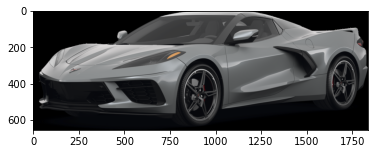

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image à tester
image_path = 'data/test/car/car_80.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en format RGB
plt.imshow(image)
# Redimensionner l'image
image = cv2.resize(image, (150, 150))

# Normaliser les valeurs des pixels
image = image / 255.0

# Ajouter une dimension pour correspondre à la forme attendue par le modèle (batch_size, height, width, channels)
image = np.expand_dims(image, axis=0)

# Utiliser le modèle ANN (par exemple)
prediction = loaded_ann_model.predict(image)

# La prédiction sera un score entre 0 et 1, vous pouvez décider d'un seuil pour considérer si c'est une voiture ou non

seuil = 0.5
if prediction < seuil:
    print("C'est une voiture")
else:
    print("Ce n'est pas une voiture")


In [62]:
image.shape

(1, 150, 150, 3)

In [63]:
prediction

array([[1.7881807e-07]], dtype=float32)